## Real-Datasets: LongBeach

The Observed Dispersion Curves and Reference Velocity Model is retrived from  [Fu et al., (2022)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VLF1FA)

* Description: Dispersion curves calculated with frequency-Bessle transform method, and picked with an AI approach DisperNet, for the Long Beach seismic array. There are 5297 dispersion curve files, with each reference position located at each station. (2022-02-02)

* Reference
  * Fu, L., Pan, L., Li, Z., Dong, S., Ma, Q. & Chen, X., 2022. Improved high‐resolution 3D vs model of long beach, CA: Inversion of multimodal dispersion curves from ambient noise of a dense array. Geophys. Res. Lett., 49, e2021GL097619. doi:10.1029/2021GL097619


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['font.family'] = 'Times New Roman'

dispersion_data_base_path = "../../../OpenSWI/Datasets/Original/OpenSWI-real/LongBeach/Dispersion-Curves"
save_base_path = "../../../OpenSWI/Datasets/OpenSWI-real/LongBeach"

### 1. load stations

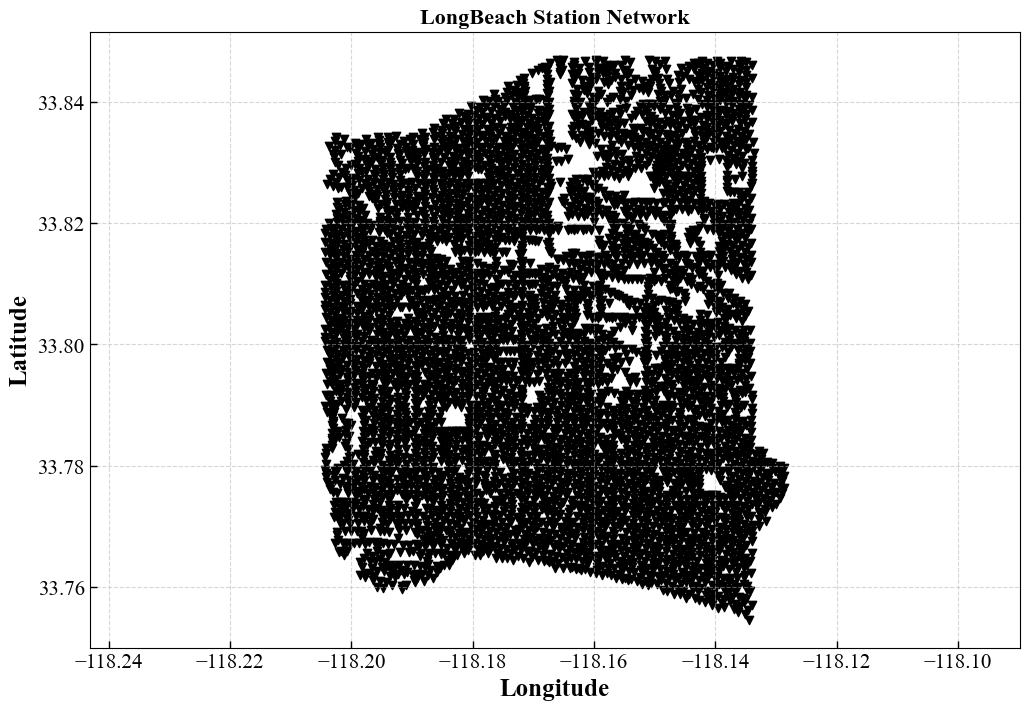

In [11]:
# check the station network
dispersion_data_station_path = os.path.join(dispersion_data_base_path,"stn_coord.txt")
stations = np.loadtxt(dispersion_data_station_path)

plt.figure(figsize=(12,8))
plt.scatter(stations[:,0],stations[:,1],c='k',marker='v')
plt.xlabel("Longitude",fontdict={'size': 18, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel("Latitude",fontdict={'size': 18, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.title("LongBeach Station Network",fontdict={'size': 16, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(fontsize=12,fontfamily='Times New Roman')
plt.yticks(fontsize=12,fontfamily='Times New Roman')
plt.tick_params(direction='in',length=5,width=1,colors='k',labelsize=15,labelcolor='k')
plt.grid(linestyle='--',alpha=0.5)
plt.axis('equal')
plt.show()

### 2. load dispersion curves

In [12]:
# load the dispersion data

dispersion_data_path = os.path.join(dispersion_data_base_path,"data/")
disp_file_lists = os.listdir(dispersion_data_path)
disp_file_lists.sort(key=lambda x:int(x.split(".")[0]))
disp_data = np.zeros((len(disp_file_lists),300,3))
disp_data_0order = np.zeros_like(disp_data)
for sta_num,sta_file in enumerate(disp_file_lists):
    # load data
    pvs = np.loadtxt(os.path.join(dispersion_data_path,sta_file))
    # flip the data
    pvs = np.flip(pvs,axis=0)
    # frequency to period
    pvs[:,0] = 1/pvs[:,0]
    # save all the dispersion data
    disp_data[sta_num,:pvs.shape[0]] = pvs
    
    # extracte the 0 order dispersion data
    mask = pvs[:,2]==0
    pvs0_f = 1/pvs[:,0][mask]
    pvs0_v = pvs[:,1][mask]
    pvs0_t = pvs[:,0][mask]
    pvs0_order = pvs[:,2][mask]
    pvs0 = np.hstack((pvs0_t.reshape(-1,1),pvs0_v.reshape(-1,1),pvs0_order.reshape(-1,1)))
    # save the 0 order dispersion data
    disp_data_0order[sta_num,:pvs0_f.shape[0]] = pvs0

disp_data.shape,disp_data_0order.shape

((5297, 300, 3), (5297, 300, 3))

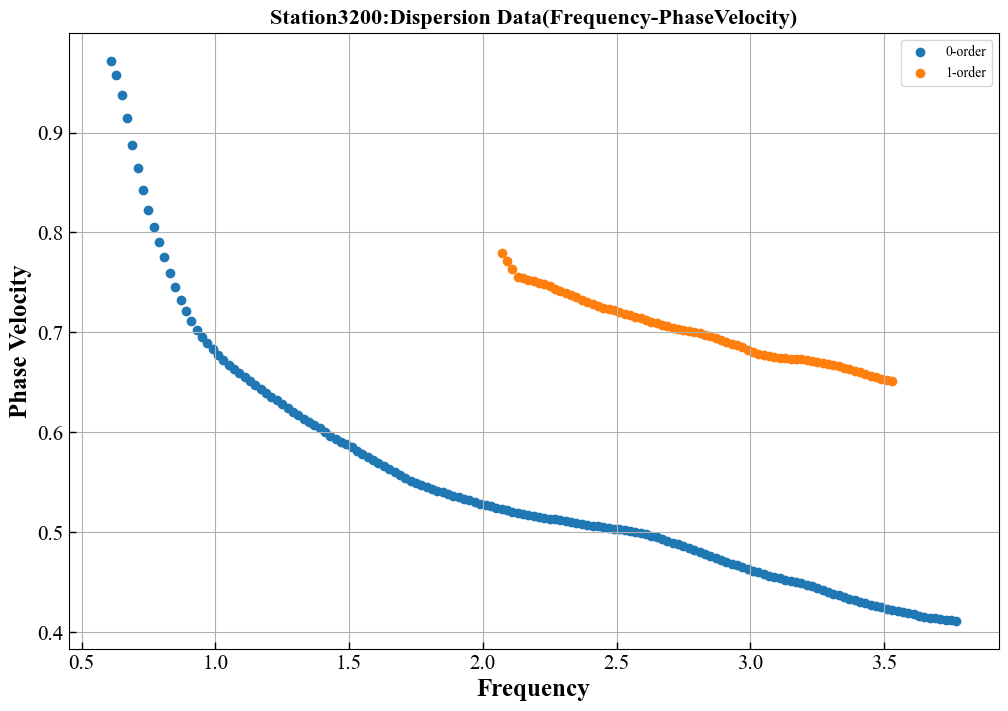

In [13]:
# remenber the first column has changed to period 
sta_show = 3200
disp_data_show = disp_data[sta_show-1]
mask = disp_data_show[:,0]>0
pvs_obs_t = disp_data_show[:,0][mask]
pvs_obs_f = 1/pvs_obs_t
pvs_obs_v = disp_data_show[:,1][mask]
pvs_obs_order = disp_data_show[:,2][mask]

plt.figure(figsize=(12,8))
for i in list(set(pvs_obs_order)):
    i = int(i)
    mask = pvs_obs_order == i
    plt.scatter(pvs_obs_f[mask],pvs_obs_v[mask],label="{}-order".format(i))
plt.title("Station{}:Dispersion Data(Frequency-PhaseVelocity)".format(sta_show),fontdict={'size': 16, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xlabel("Frequency",fontdict={'size': 18, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.ylabel("Phase Velocity",fontdict={'size': 18, 'weight': 'bold', 'fontfamily': 'Times New Roman'})
plt.xticks(fontsize=12,fontfamily='Times New Roman')
plt.yticks(fontsize=12,fontfamily='Times New Roman')
plt.tick_params(direction='in',length=5,width=1,colors='k',labelsize=15,labelcolor='k')
plt.grid()
plt.legend()
plt.show()

In [14]:
# transform the last column to 0 [period, phase velocity, order] -> [period, phase velocity, group velocity]
disp_data_0order[:,:,2] = 0

In [15]:
disp_data_0order.shape

(5297, 300, 3)

In [ ]:
np.savez_compressed(os.path.join(save_base_path,"longbeach_disp.npz"),data=disp_data_0order.astype(np.float32))


### 3. load reference velocity model

In [16]:
velocity_model_base_path  = "../../../OpenSWI/Datasets/Original/OpenSWI-real/LongBeach/Velocity-Models/LB3D_vs_models"

velocity_model_station_path = os.path.join(velocity_model_base_path,"stn_coord.txt")
velocity_model_path = os.path.join(velocity_model_base_path,"m01")
stations = np.loadtxt(velocity_model_station_path)
stations.shape

(5297, 2)

In [17]:
vel_file_lists = os.listdir(velocity_model_path)
vel_file_lists.sort(key=lambda x:int(x.split(".")[0]))
vel_data_ref = np.zeros((len(vel_file_lists),200,4)) # depth, vp, vs, rho
for sta_num,sta_file in enumerate(vel_file_lists):
    # load data
    vel = np.loadtxt(os.path.join(velocity_model_path,sta_file))
    depth = vel[:,1]
    rho = vel[:,2]
    vs = vel[:,3]
    vp = vel[:,4]
    
    vel_data_ref[sta_num,:depth.shape[0],:] = np.hstack((depth.reshape(-1,1),vp.reshape(-1,1),vs.reshape(-1,1),rho.reshape(-1,1)))

vel_data_ref.shape

(5297, 200, 4)

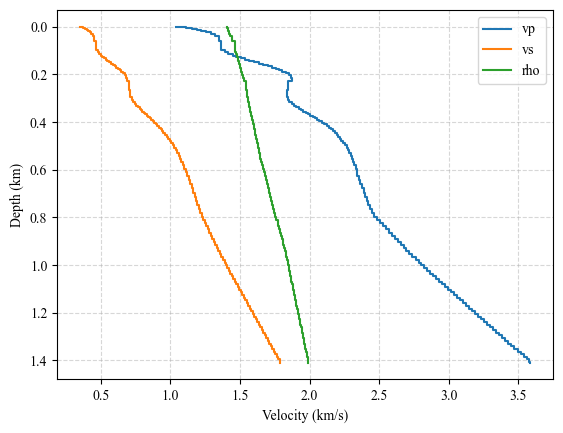

In [18]:
plt_idx = 2000

depth = vel_data_ref[plt_idx,:,0]
vp    = vel_data_ref[plt_idx,:,1]
vs    = vel_data_ref[plt_idx,:,2]
rho   = vel_data_ref[plt_idx,:,3]

mask  = vp>0
vp    = vp[mask]
vs    = vs[mask]
rho   = rho[mask]
depth = depth[mask]

plt.figure()
plt.step(vp,depth,where='post',label='vp')
plt.step(vs,depth,where='post',label='vs')
plt.step(rho,depth,where='post',label='rho')
plt.gca().invert_yaxis()
plt.xlabel("Velocity (km/s)")
plt.ylabel("Depth (km)")
plt.legend()
plt.grid(linestyle='--',alpha=0.5)
plt.show()


In [ ]:
np.savez_compressed(os.path.join(save_base_path,"longbeach_model01.npz"),data=vel_data_ref.astype(np.float32))

### 4. Interpolation 1D velcoity model and Forward Modeling Synthetic Datasets

In [19]:
from p_tqdm import p_map
from scipy import interpolate
import sys
sys.path.append("../../../")
from SWIDP.dispersion import *
from tqdm import tqdm

In [ ]:
# Initialize empty lists to store data
disp_data_all  = []
vel_models_all = []

for i in tqdm(range(len(vel_data_ref))):
    depth   = vel_data_ref[i,:,0]
    vs      = vel_data_ref[i,:,2]
    mask    = depth > 0
    mask[0] = True
    depth   = depth[mask]
    vs      = vs[mask]
    f = interpolate.interp1d(depth,vs,kind='linear') 
    depth_interp = np.arange(0,35)*0.04
    vs_interp = f(depth_interp)
    vel_model = transform_vs_to_vel_model(vs_interp,depth_interp)
    t = generate_mixed_samples(num_samples=100,start=0.25,end=1.80,uniform_num=30,log_num=30,random_num=40)
    disp = calculate_dispersion(vel_model,t=t,dc=0.001)
    
    disp_data_all.append(disp)
    vel_models_all.append(vel_model)
    
disp_data_all = np.array(disp_data_all)
vel_models_all = np.array(vel_models_all)

 24%|██▎       | 1252/5297 [00:53<02:48, 23.98it/s]

 24%|██▍       | 1279/5297 [00:54<02:51, 23.43it/s]

In [34]:
# Filter out zero dispersion curves and corresponding velocity models
valid_indices = ~np.all(disp_data_all == 0, axis=(1,2))
disp_data_all = disp_data_all[valid_indices]
vel_models_all = vel_models_all[valid_indices]

# Create output directory if it doesn't exist
os.makedirs(save_base_path, exist_ok=True)

# Save processed data as compressed npz files
np.savez_compressed(os.path.join(save_base_path, "syn_model.npz"),
                    data=vel_models_all.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "syn_disp.npz"),
                    data=disp_data_all.astype(np.float32))